In [1]:
import matplotlib.pyplot as plt
import numpy as np
import fastf1.plotting
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker
from fastf1 import utils

In [2]:
# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(misc_mpl_mods=False, color_scheme='fastf1' )


# load a session and its telemetry data
session = fastf1.get_session(2025, 'Australian Grand Prix', 'FP3')
session.load()
# In this way i Can exclude the box laps
laps = session.laps.pick_wo_box()

# Pick just the accurate laps
laps = laps[laps['IsAccurate']==True]

circuit_info = session.get_circuit_info()




req         WARNING 	DEFAULT CACHE ENABLED! (3.05 GB) /Users/PietroPaolo/Library/Caches/fastf1
core           INFO 	Loading data for Australian Grand Prix - Practice 3 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '5',

In [3]:
display(laps)

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
1,0 days 00:29:28.948000,VER,1,0 days 00:01:17.632000,2.0,1.0,NaT,NaT,0 days 00:00:27.077000,0 days 00:00:17.521000,...,True,Red Bull Racing,0 days 00:28:11.316000,2025-03-15 01:47:17.827,1,NaN,False,,False,True
4,0 days 00:35:34.547000,VER,1,0 days 00:01:16.646000,5.0,2.0,NaT,NaT,0 days 00:00:26.763000,0 days 00:00:17.161000,...,False,Red Bull Racing,0 days 00:34:17.901000,2025-03-15 01:53:24.412,1,NaN,False,,False,True
7,0 days 00:41:44.306000,VER,1,0 days 00:01:21.128000,8.0,3.0,NaT,NaT,0 days 00:00:26.731000,0 days 00:00:17.117000,...,False,Red Bull Racing,0 days 00:40:23.178000,2025-03-15 01:59:29.689,1,NaN,False,,False,True
11,0 days 00:56:22.230000,VER,1,0 days 00:01:16.002000,12.0,5.0,NaT,NaT,0 days 00:00:26.398000,0 days 00:00:17.110000,...,True,Red Bull Racing,0 days 00:55:06.228000,2025-03-15 02:14:12.739,1,NaN,False,,False,True
16,0 days 01:13:11.266000,VER,1,0 days 00:01:58.432000,17.0,7.0,NaT,NaT,0 days 00:00:29.964000,0 days 00:00:19.674000,...,False,Red Bull Racing,0 days 01:11:12.834000,2025-03-15 02:30:19.345,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,0 days 00:57:11.136000,PIA,81,0 days 00:01:16.077000,9.0,3.0,NaT,NaT,0 days 00:00:26.358000,0 days 00:00:17.276000,...,True,McLaren,0 days 00:55:55.059000,2025-03-15 02:15:01.570,1,NaN,False,,False,True
343,0 days 00:59:07.356000,PIA,81,0 days 00:01:56.220000,10.0,3.0,NaT,NaT,0 days 00:00:41.072000,0 days 00:00:25.475000,...,True,McLaren,0 days 00:57:11.136000,2025-03-15 02:16:17.647,1,NaN,False,,False,True
344,0 days 01:01:01.145000,PIA,81,0 days 00:01:53.789000,11.0,3.0,NaT,NaT,0 days 00:00:46.414000,0 days 00:00:25.722000,...,True,McLaren,0 days 00:59:07.356000,2025-03-15 02:18:13.867,1,NaN,False,,False,True
345,0 days 01:02:17.066000,PIA,81,0 days 00:01:15.921000,12.0,3.0,NaT,NaT,0 days 00:00:26.425000,0 days 00:00:17.200000,...,True,McLaren,0 days 01:01:01.145000,2025-03-15 02:20:07.656,1,NaN,False,,False,True


In [4]:
drivers =laps['Driver'].unique()
compounds = laps['Compound'].unique()


In [5]:
def timedelta_to_seconds(td: pd.Timedelta) -> float:
    """
    Convert a pandas Timedelta to a float representing the total seconds.
    
    Parameters:
    - td: pd.Timedelta
    
    Returns:
    - float: total seconds
    """
    return td.total_seconds()

In [6]:
# Transform the laps in total seconds
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()



# order the team from the fastest (lowest median lap time) to slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)

# make a color palette associating team names to hex codes

specific_color_kick_sauber = '#90EE90'  # Light green
specific_color_alpha_tauri = '#1634cb'  # Specific blue color

def get_team_color(team):
    if team == 'Kick Sauber' or team == 'Alfa Romeo':
        return specific_color_kick_sauber
    elif team == 'AlphaTauri':
        return specific_color_alpha_tauri
    else:
        try:
            return fastf1.plotting.team_color(team)
        except KeyError:
            return '#000000'  # Default color (black) if team is not recognized

team_palette = {team: get_team_color(team) for team in team_order}


/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/plotting/_plotting.py:237: FutureWarning: The function `team_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_team_color` instead.
  warnings.warn("The function `team_color` is deprecated and will be "
_plotting    WARNING 	Correcting invalid user input 'red bull ' to 'red bull'.
_plotting    WARNING 	Correcting invalid user input ' bulls' to 'red bull'.
_plotting    WARNING 	Correcting invalid user input 'haas  ' to 'haas'.


In [7]:
colors = {
    # Red Bull Racing
    "VER": "blue",  # Max Verstappen
    "LAW": "blue",  # Liam Lawson

    # McLaren
    "NOR": "orange",  # Lando Norris
    "PIA": "orange",  # Oscar Piastri

    # Ferrari
    "LEC": "red",    # Charles Leclerc
    "HAM": "red",    # Lewis Hamilton

    # Mercedes
    "RUS": "grey",   # George Russell
    "ANT": "grey",   # Andrea Kimi Antonelli

    # Aston Martin
    "ALO": "green",  # Fernando Alonso
    "STR": "green",  # Lance Stroll

    # Alpine
    "GAS": "pink",   # Pierre Gasly
    "DOO": "pink",   # Jack Doohan

    # Haas
    "OCO": "olive",  # Esteban Ocon
    "BEA": "olive",  # Oliver Bearman

    # Racing Bulls (formerly AlphaTauri)
    "HAD": "#9932CC",  # Isack Hadjar
    "TSU": "#9932CC",  # Yuki Tsunoda

    # Williams
    "ALB": "navy",   # Alexander Albon
    "SAI": "navy",   # Carlos Sainz Jr.

    # Sauber (transitioning to Audi)
    "HUL": "lime",   # Nico Hülkenberg
    "BOR": "lime",   # Gabriel Bortoleto
}

In [8]:
def interpolate_dataframe(df):
    # Creating a new DataFrame with interpolated data
    new_df = pd.DataFrame()

    for column in df.columns:
        # Interpolating each column
        original_data = df[column].to_numpy()
        interleaved_data = np.empty(2 * len(original_data) - 1, dtype=original_data.dtype)
        
        # Fill with original data in even indices
        interleaved_data[0::2] = original_data

        # Check the data type of the column
        if np.issubdtype(original_data.dtype, np.number):
            # Interpolated data for numerical columns
            interleaved_data[1::2] = (original_data[:-1] + original_data[1:]) / 2
        elif np.issubdtype(original_data.dtype, np.datetime64):
            # Interpolated data for datetime columns
            interleaved_data[1::2] = (original_data[:-1] + (original_data[1:] - original_data[:-1]) / 2)
        elif np.issubdtype(original_data.dtype, np.bool_):
            # For boolean columns, use logical interpolation (e.g., keep the previous value)
            interleaved_data[1::2] = original_data[:-1]
        else:
            # For any other types, fallback to forward fill
            interleaved_data[1::2] = original_data[:-1]

        # Assigning the new column to the new DataFrame
        new_df[column] = interleaved_data

    return new_df

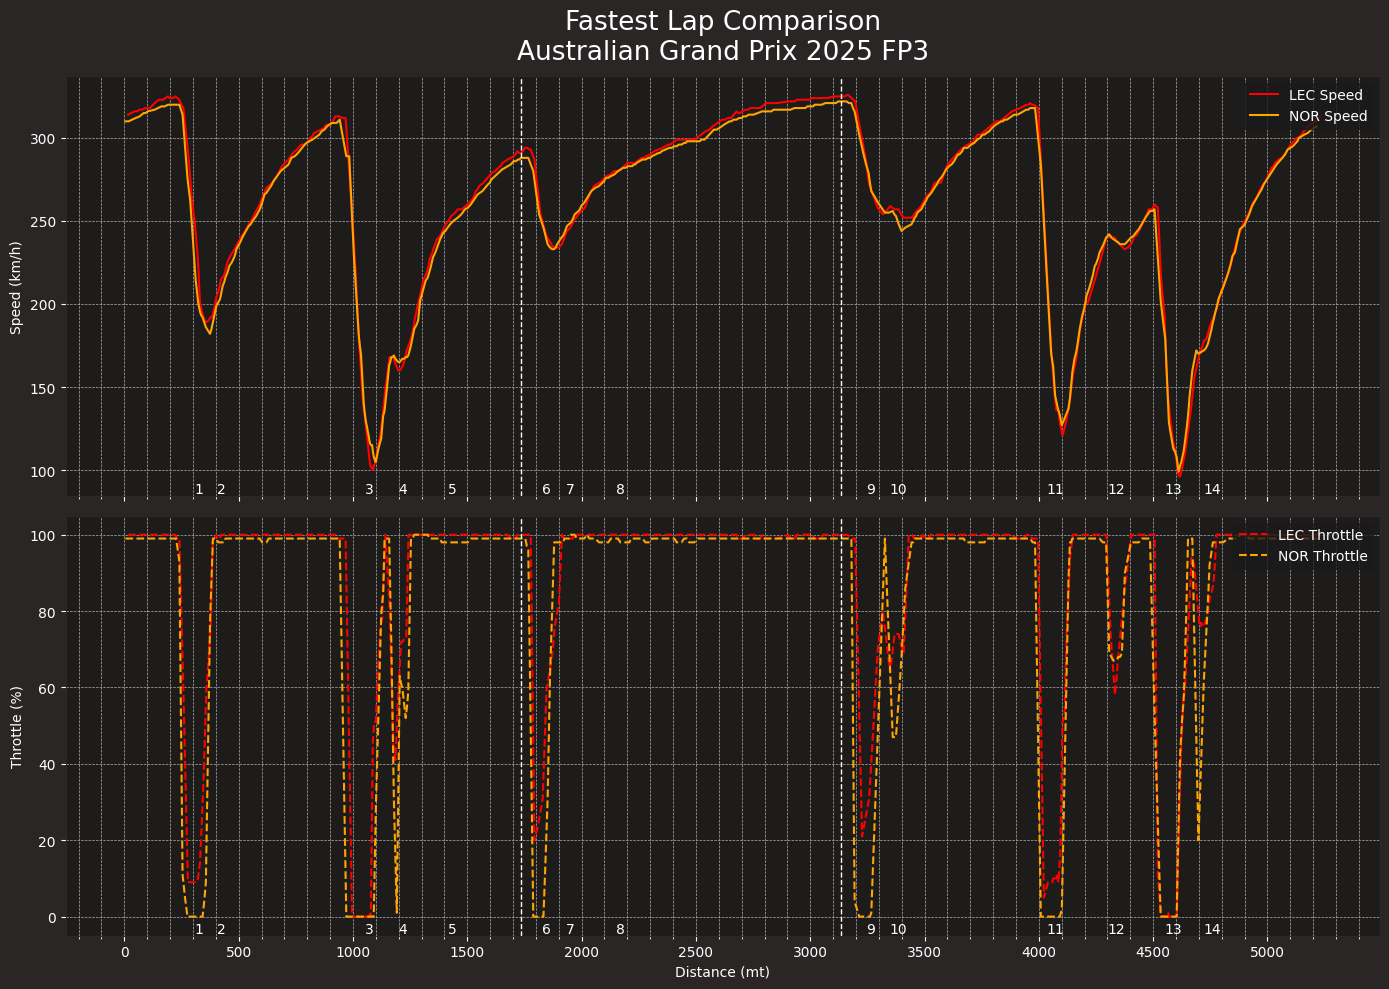

In [9]:
# Extract fastest laps for LEC and SAI
LEC_FASTEST_LAP = transformed_laps.pick_drivers('LEC').pick_fastest()
NOR_FASTEST_LAP = transformed_laps.pick_drivers('NOR').pick_fastest()
#VER_FASTEST_LAP = transformed_laps.pick_drivers('VER').pick_fastest()

# Get telemetry data and add distance
LEC_tel = LEC_FASTEST_LAP.get_car_data().add_distance()
NOR_tel = NOR_FASTEST_LAP.get_car_data().add_distance()
#VER_tel = VER_FASTEST_LAP.get_car_data().add_distance()

#interpolating
LEC_tel = interpolate_dataframe(LEC_tel)
#VER_tel = interpolate_dataframe(VER_tel)
NOR_tel = interpolate_dataframe(NOR_tel)
# Length of the track
length_circuit = LEC_tel['Distance'].max()

# Get sector times for the fastest lap
LEC_sector_times = [
    timedelta_to_seconds(LEC_FASTEST_LAP['Sector1Time']),
    timedelta_to_seconds(LEC_FASTEST_LAP['Sector2Time']),
    timedelta_to_seconds(LEC_FASTEST_LAP['Sector3Time'])
]

# Calculate total lap time
total_lap_time = sum(LEC_sector_times)

# Calculate sector end distances
sector1_end_distance = LEC_tel[LEC_tel['Time'] <= LEC_FASTEST_LAP['Sector1Time']]['Distance'].max()
sector2_end_distance = LEC_tel[LEC_tel['Time'] <= (LEC_FASTEST_LAP['Sector1Time'] + LEC_FASTEST_LAP['Sector2Time'])]['Distance'].max()

# Extract the 'Distance' column from the corners DataFrame
corner_distances = circuit_info.corners['Distance']
# Generate corner numbers based on the number of corners
corner_numbers = range(1, len(corner_distances) + 1)  # Generates sequential numbers from 1 to the number of corners


# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Apply a dark background
plt.style.use('dark_background')

# Plot Speed on the first subplot
ax1.plot(LEC_tel['Distance'], LEC_tel['Speed'], color='red', label='LEC Speed')
#ax1.plot(VER_tel['Distance'], VER_tel['Speed'], color='blue', label='VER Speed')
ax1.plot(NOR_tel['Distance'], NOR_tel['Speed'], color='orange', label='NOR Speed')
ax1.set_ylabel('Speed (km/h)', color='white')
ax1.tick_params(axis='y', colors='white')
ax1.tick_params(axis='x', colors='white')
ax1.grid(which='both', linestyle='--', linewidth=0.5)
ax1.legend(loc='upper right')
ax1.set_title(f"Fastest Lap Comparison\n{session.event['EventName']} {session.event.year} FP3", color='white')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(500))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(100))

# Annotate with corner numbers on ax1
for corner, number in zip(corner_distances, corner_numbers):
    ax1.text(corner, ax1.get_ylim()[0], str(number), color='white', fontsize=10, verticalalignment='bottom', horizontalalignment='center')
# Plot Throttle on the second subplot
ax2.plot(LEC_tel['Distance'], LEC_tel['Throttle'], color='red', linestyle='--', label='LEC Throttle')
#ax2.plot(VER_tel['Distance'], VER_tel['Throttle'], color='blue', linestyle='--', label='VER Throttle')
ax2.plot(NOR_tel['Distance'], NOR_tel['Throttle'], color='orange', linestyle='--', label='NOR Throttle')
ax2.set_xlabel('Distance (mt)', color='white')
ax2.set_ylabel('Throttle (%)', color='white')
ax2.tick_params(axis='y', colors='white')
ax2.tick_params(axis='x', colors='white')
ax2.grid(which='both', linestyle='--', linewidth=0.5)
ax2.legend(loc='upper right')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(500))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(100))

# Annotate with corner numbers on ax2
for corner, number in zip(corner_distances, corner_numbers):
    ax2.text(corner, ax2.get_ylim()[0], str(number), color='white', fontsize=10, verticalalignment='bottom', horizontalalignment='center')


# Add custom vertical dashed lines for sectors to both subplots
for ax in [ax1, ax2]:
    ax.axvline(x=sector1_end_distance, color='white', linestyle='--', linewidth=1, label='End of Sector 1')
    ax.axvline(x=sector2_end_distance, color='white', linestyle='--', linewidth=1, label='End of Sector 2')

# Adjust layout
plt.tight_layout()
plt.show()


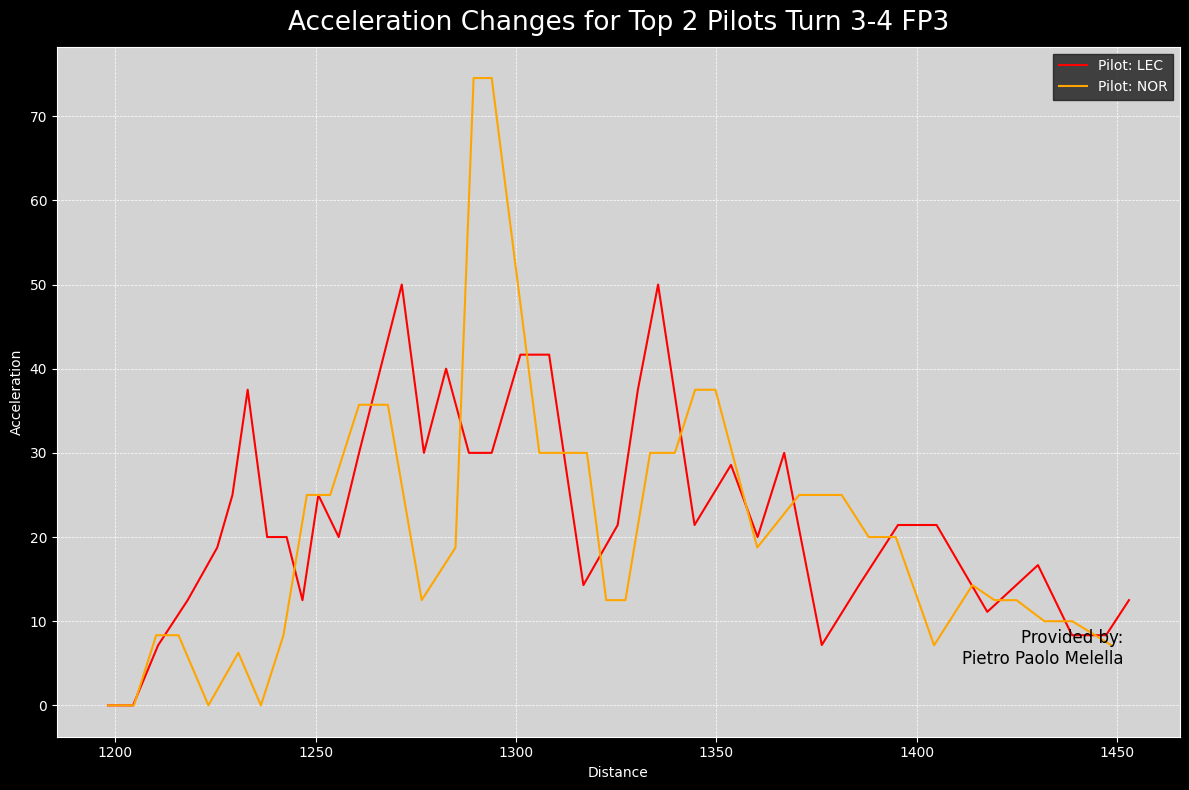

In [10]:
drivers_4= ['LEC', 'NOR']

# Initialize a figure for the plot
plt.figure(figsize=(12, 8))
# Set the background color of the plot (axes area)
plt.gca().set_facecolor('lightgray')

# Loop through each driver and plot their speed changes
for pilot in drivers_4:
    # Pick the fastest lap for each pilot
    fastest_laps_for_pilot = transformed_laps.pick_drivers(pilot).pick_fastest()
    
    # Get car data and add distance
    pilot_car_data = fastest_laps_for_pilot.get_car_data().add_distance()

    #interpolating
    pilot_car_data = interpolate_dataframe(pilot_car_data)
    
    # Selecting the data starting for turn 6
    pilot_car_data_turn_6 = pilot_car_data[
        (pilot_car_data['Distance'] > (corner_distances[3]-25)) & 
        (pilot_car_data['Distance'] < corner_distances[4]+25)
    ].copy()  # Ensure it's a copy to avoid SettingWithCopyWarning

    # Calculate acceleration
    pilot_car_data_turn_6.loc[:, 'Acceleration'] = (
        (pilot_car_data_turn_6['Speed'].diff().fillna(0)) /
        pilot_car_data_turn_6['SessionTime'].dt.total_seconds().diff().fillna(0)
    ).fillna(0)

    # Filter rows where throttle is less than 101 and reset index
    pilot_car_data_turn_6_throttle_99 = pilot_car_data_turn_6[
        pilot_car_data_turn_6['Throttle'] < 101
    ].reset_index()

    # Plot the speed vs. distance for the current pilot, using the color from the 'colors' dictionary
    plt.plot(pilot_car_data_turn_6_throttle_99['Distance'], 
             pilot_car_data_turn_6_throttle_99['Acceleration'], 
             color=colors.get(pilot, 'black'),  # Use pilot-specific color or default to 'black' if not found
             label=f"Pilot: {pilot}")

# Add a signature in the lower-right corner with a newline
plt.text(
    0.95, 0.1, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='Black', fontsize=12
)

# Add labels and title
plt.xlabel('Distance')
plt.ylabel('Acceleration')
plt.title('Acceleration Changes for Top 2 Pilots Turn 3-4 FP3')
plt.grid(which='both', linestyle='--', linewidth=0.5)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

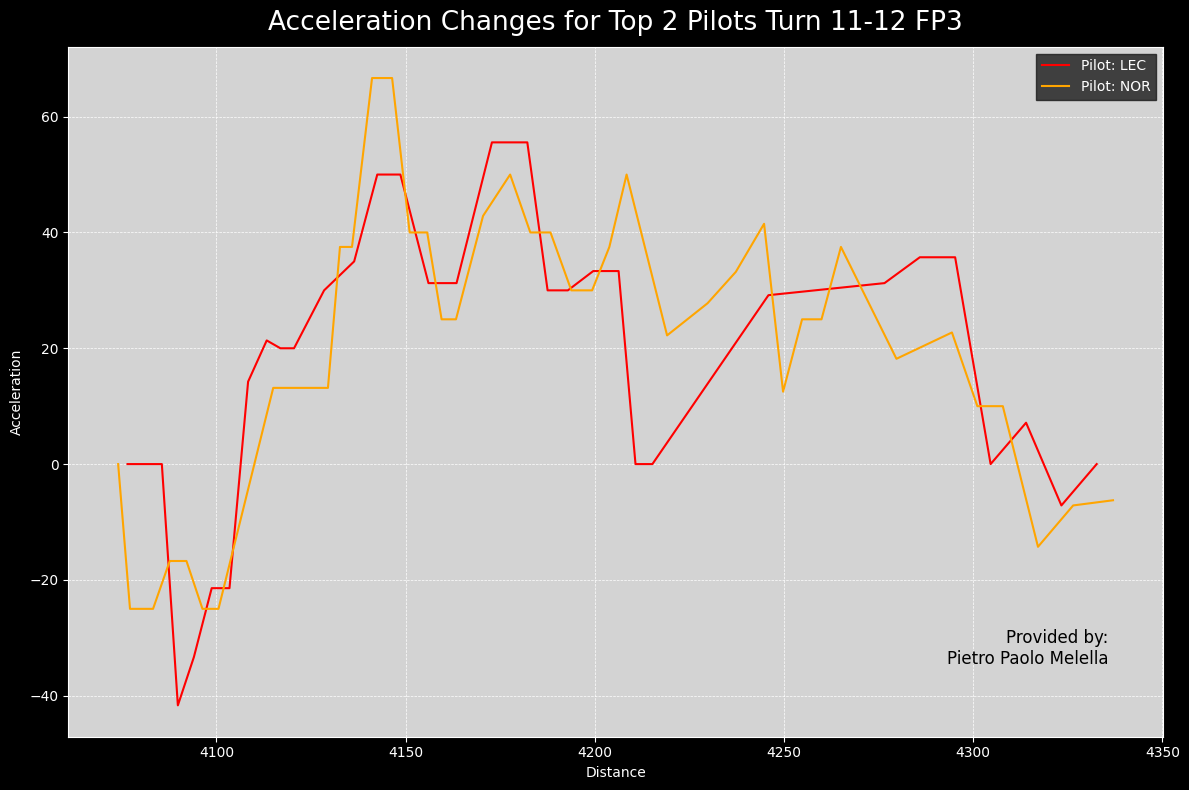

In [11]:
# Initialize a figure for the plot
plt.figure(figsize=(12, 8))
# Set the background color of the plot (axes area)
plt.gca().set_facecolor('lightgray')

# Loop through each driver and plot their speed changes
for pilot in drivers_4:
    # Pick the fastest lap for each pilot
    fastest_laps_for_pilot = transformed_laps.pick_drivers(pilot).pick_fastest()
    
    # Get car data and add distance
    pilot_car_data = fastest_laps_for_pilot.get_car_data().add_distance()

    #interpolating
    pilot_car_data = interpolate_dataframe(pilot_car_data)
    
    # Selecting the data starting for turn 6
    pilot_car_data_turn_6 = pilot_car_data[
        (pilot_car_data['Distance'] > (corner_distances[10])) & 
        (pilot_car_data['Distance'] < corner_distances[11])
    ].copy()  # Ensure it's a copy to avoid SettingWithCopyWarning

    # Calculate acceleration
    pilot_car_data_turn_6.loc[:, 'Acceleration'] = (
        (pilot_car_data_turn_6['Speed'].diff().fillna(0)) /
        pilot_car_data_turn_6['SessionTime'].dt.total_seconds().diff().fillna(0)
    ).fillna(0)

    # Filter rows where throttle is less than 101 and reset index
    pilot_car_data_turn_6_throttle_99 = pilot_car_data_turn_6[
        pilot_car_data_turn_6['Throttle'] < 101
    ].reset_index()

    # Plot the speed vs. distance for the current pilot, using the color from the 'colors' dictionary
    plt.plot(pilot_car_data_turn_6_throttle_99['Distance'], 
             pilot_car_data_turn_6_throttle_99['Acceleration'], 
             color=colors.get(pilot, 'black'),  # Use pilot-specific color or default to 'black' if not found
             label=f"Pilot: {pilot}")

# Add a signature in the lower-right corner with a newline
plt.text(
    0.95, 0.1, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='Black', fontsize=12
)

# Add labels and title
plt.xlabel('Distance')
plt.ylabel('Acceleration')
plt.title('Acceleration Changes for Top 2 Pilots Turn 11-12 FP3')
plt.grid(which='both', linestyle='--', linewidth=0.5)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

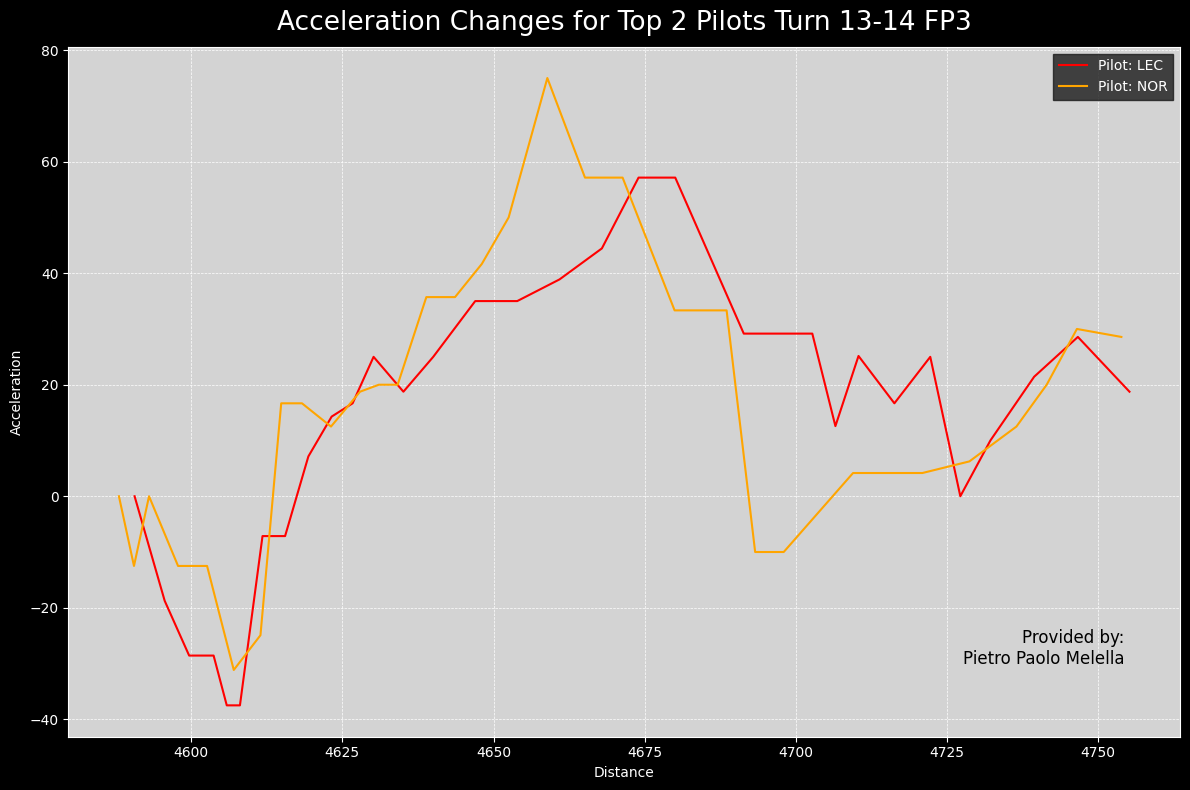

In [12]:
# Initialize a figure for the plot
plt.figure(figsize=(12, 8))
# Set the background color of the plot (axes area)
plt.gca().set_facecolor('lightgray')

# Loop through each driver and plot their speed changes
for pilot in drivers_4:
    # Pick the fastest lap for each pilot
    fastest_laps_for_pilot = transformed_laps.pick_drivers(pilot).pick_fastest()
    
    # Get car data and add distance
    pilot_car_data = fastest_laps_for_pilot.get_car_data().add_distance()

    #interpolating
    pilot_car_data = interpolate_dataframe(pilot_car_data)
    
    # Selecting the data starting for turn 6
    pilot_car_data_turn_6 = pilot_car_data[
        (pilot_car_data['Distance'] > (corner_distances[12])) & 
        (pilot_car_data['Distance'] < corner_distances[13])
    ].copy()  # Ensure it's a copy to avoid SettingWithCopyWarning

    # Calculate acceleration
    pilot_car_data_turn_6.loc[:, 'Acceleration'] = (
        (pilot_car_data_turn_6['Speed'].diff().fillna(0)) /
        pilot_car_data_turn_6['SessionTime'].dt.total_seconds().diff().fillna(0)
    ).fillna(0)

    # Filter rows where throttle is less than 101 and reset index
    pilot_car_data_turn_6_throttle_99 = pilot_car_data_turn_6[
        pilot_car_data_turn_6['Throttle'] < 101
    ].reset_index()

    # Plot the speed vs. distance for the current pilot, using the color from the 'colors' dictionary
    plt.plot(pilot_car_data_turn_6_throttle_99['Distance'], 
             pilot_car_data_turn_6_throttle_99['Acceleration'], 
             color=colors.get(pilot, 'black'),  # Use pilot-specific color or default to 'black' if not found
             label=f"Pilot: {pilot}")

# Add a signature in the lower-right corner with a newline
plt.text(
    0.95, 0.1, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='Black', fontsize=12
)

# Add labels and title
plt.xlabel('Distance')
plt.ylabel('Acceleration')
plt.title('Acceleration Changes for Top 2 Pilots Turn 13-14 FP3')
plt.grid(which='both', linestyle='--', linewidth=0.5)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()